In [42]:
%pylab inline
import h5py 
import programas as pg
import pandas as pd
import grispy as gsp

Populating the interactive namespace from numpy and matplotlib


/home/arodriguez/miniconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['grid']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [43]:
file = h5py.File('/mnt/projects/bias_mock/galpos_RedSample.hdf5','r')
pos = file['Subhalo/SubhaloPos'][()]
v0 = np.loadtxt('sphvds_raul-0.8.dat')
centres = v0[:,2:5]

Lbox = 1440
grid = gsp.GriSPy(pos, N_cells=32)
periodic = {0: (0, Lbox), 1: (0, Lbox), 2: (0, Lbox)}
grid.set_periodicity(periodic, inplace=True)

In [44]:
id_void = 7056

x0 = centres[id_void][0]
y0 = centres[id_void][1]
z0 = centres[id_void][2]
vradii = v0[id_void,1]
print(x0,y0,z0,vradii)

# busco vecinos

upper_radii = vradii*4
bubble_dist, bubble_ind = grid.bubble_neighbors(
    np.array([[x0,y0,z0]]), distance_upper_bound=upper_radii
)

853.8067016601562 760.9550170898438 518.4815673828125 19.05540466308594


In [45]:
mask, = np.where((abs(pos[:,0]-x0)<vradii*3) & (abs(pos[:,1]-y0)<vradii*3) & (abs(pos[:,2]-z0)<vradii*3))

In [46]:
mask = np.array(bubble_ind[0])

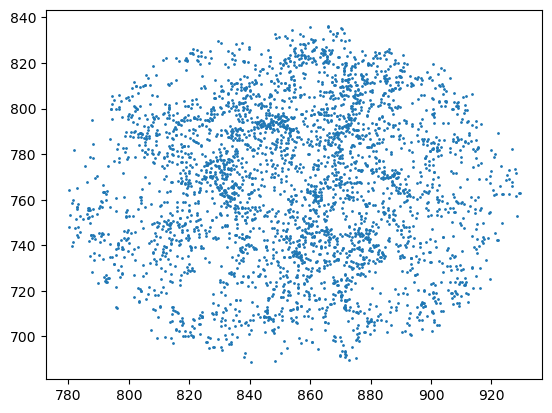

In [47]:
plt.plot(pos[mask,0],pos[mask,1],ls='none',marker='o',markersize=1)

In [61]:
field = np.load('/mnt/projects/bias_mock/galaxies/rhogal_2e-04_eul_bias_gaus.npy')

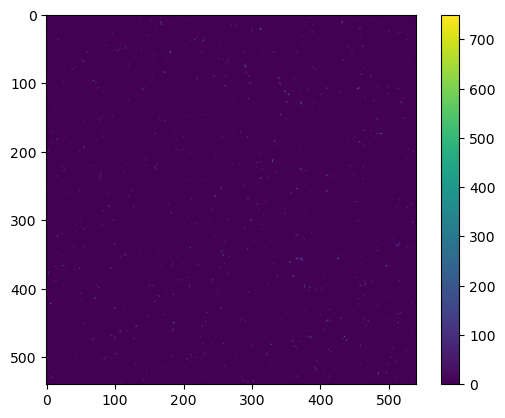

In [62]:
plt.imshow(field[0])
plt.colorbar()

In [77]:
v = np.loadtxt('/mnt/projects/bias_mock/voids/sphvds_raul-RedSample_2e-03-0.9.dat')

(array([3.1180e+04, 1.3582e+04, 7.2650e+03, 5.1040e+03, 2.1420e+03,
        9.3300e+02, 3.1000e+02, 8.8000e+01, 2.8000e+01, 1.2000e+01]),
 array([10.60787868, 12.70221643, 14.79655418, 16.89089193, 18.98522968,
        21.07956743, 23.17390518, 25.26824293, 27.36258068, 29.45691843,
        31.55125618]),
 <BarContainer object of 10 artists>)

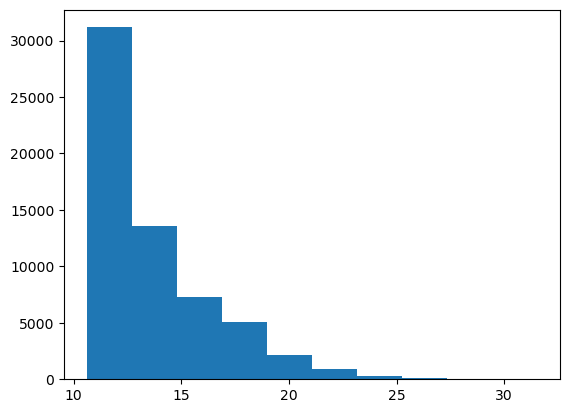

In [78]:
plt.hist(v[:,1])

In [74]:
np.mean(v[:,1])

27.63594599901146